<a href="https://colab.research.google.com/github/Sravani-05/GMM-Clustering/blob/main/Cluster_with_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ECommerce_consumer behaviour**

ML Assignment 2 : Clusetring with GMM

COURSE CODE - CMPE257


NAME - RAPARLA SRAVANI(016656601)


Following steps are done to arrive at the business conclusion.

Preparing the dataset

Identifying number of columns for clustering

Find the optimum clusters using Elbow method

Applying GMM clustering with Scikit Learn

Applying K-means clustering using Tensor Flow

Applying K-means, Mini Batch KMeans clustering using Scikit Learn

Comparing Metrics between the algorithms

Analysing the resultant clusters

Bar chart plots to compare cluseters

Visualizing restricted count using state wise map

**Importing Required Libraries**

In [18]:
# importing the relevant libraries
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib as mp
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import silhouette_score

# Change defaults
sns.set(style='whitegrid', context='talk', palette='rainbow')

import plotly.io as pio
import plotly.express as px

pio.templates.default = 'plotly_dark'
pd.set_option('display.max_columns', None)

In [24]:
events = pd.read_csv('/content/drive/MyDrive/ML257/events.csv')
game_info = pd.read_csv('/content/drive/MyDrive/ML257/ginf.csv')

In [25]:
game_info.head()

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN
1,Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN
2,bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0,1.83,4.20,4.80,NaN,NaN,NaN,NaN
3,CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,1,1.55,4.50,9.40,NaN,NaN,NaN,NaN
4,GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,2011-08-06,F1,2012,france,Caen,Valenciennes,1,0,2.50,3.40,3.45,NaN,NaN,NaN,NaN


In [26]:
events.isna().count()

id_odsp          941009
id_event         941009
sort_order       941009
time             941009
text             941009
event_type       941009
event_type2      941009
side             941009
event_team       941009
opponent         941009
player           941009
player2          941009
player_in        941009
player_out       941009
shot_place       941009
shot_outcome     941009
is_goal          941009
location         941009
bodypart         941009
assist_method    941009
situation        941009
fast_break       941009
dtype: int64

In [27]:
events.head()

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,mladen petric,gokhan tore,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,dennis diekmeier,dennis diekmeier,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,heiko westermann,heiko westermann,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,sven bender,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,gokhan tore,NaN,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0


In [28]:
game_info.columns
     

Index(['id_odsp', 'link_odsp', 'adv_stats', 'date', 'league', 'season',
       'country', 'ht', 'at', 'fthg', 'ftag', 'odd_h', 'odd_d', 'odd_a',
       'odd_over', 'odd_under', 'odd_bts', 'odd_bts_n'],
      dtype='object')

In [29]:
game_info['goal_differential_home-away']=game_info['fthg']-game_info['ftag']

home_perf=game_info.groupby('ht')['goal_differential_home-away'].mean().sort_values()
home_perf

ht
SpVgg Greuther Furth   -1.444444
US Pescara             -1.379310
Wolves                 -1.263158
Cordoba                -1.105263
Kaiserslautern         -0.944444
                          ...   
Manchester City         1.735849
Paris Saint-Germain     1.904762
Bayern Munich           2.393617
Real Madrid             2.504762
Barcelona               2.701923
Name: goal_differential_home-away, Length: 147, dtype: float64

In [30]:
away_perf=(-1*game_info.groupby('at')['goal_differential_home-away'].mean()).sort_values()
away_perf
     

at
Frosinone                    -1.736842
US Pescara                   -1.517241
Livorno                      -1.473684
TSV Eintracht Braunschweig   -1.470588
Cardiff                      -1.421053
                                ...   
Paris Saint-Germain           0.915094
Juventus                      0.971154
Real Madrid                   1.359223
Barcelona                     1.447619
Bayern Munich                 1.462366
Name: goal_differential_home-away, Length: 148, dtype: float64

In [32]:
game_info

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n,goal_differential_home-away
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN,2
1,Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN,0
2,bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0,1.83,4.20,4.80,NaN,NaN,NaN,NaN,2
3,CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,1,1.55,4.50,9.40,NaN,NaN,NaN,NaN,-1
4,GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,2011-08-06,F1,2012,france,Caen,Valenciennes,1,0,2.50,3.40,3.45,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10107,xAkY8l6R/,/soccer/italy/serie-a/genoa-crotone-xAkY8l6R/,True,2017-01-22,I1,2017,italy,Genoa,Crotone,2,2,1.97,4.35,8.00,1.95,2.03,2.03,1.86,0
10108,xSU9scI9/,/soccer/england/premier-league/chelsea-hull-ci...,True,2017-01-22,E0,2017,england,Chelsea,Hull,2,0,1.19,8.50,20.00,1.54,2.68,2.40,1.66,2
10109,xY7uZwOI/,/soccer/france/ligue-1/monaco-lorient-xY7uZwOI/,True,2017-01-22,F1,2017,france,AS Monaco,Lorient,4,0,1.32,6.24,11.50,1.53,3.08,1.80,2.25,4
10110,YyeGxMX8/,/soccer/spain/laliga/betis-gijon-YyeGxMX8/,True,2017-01-22,SP1,2017,spain,Real Betis,Sporting Gijon,0,0,1.74,4.07,5.90,2.20,1.89,2.05,1.86,0


Team similarity (KMeans)


In this section, we prepare a dataset for team performance and apply KMeans clustering.

In [33]:
events['shot_outcome'].unique()

array([ 2., nan,  1.,  3.,  4.])

In [34]:
goals=events[events['shot_outcome']==1] #1 is on target

In [35]:
goals=goals[goals['text'].apply(lambda x:'Goal' in x)]
goals

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
13,UFot0hit/,UFot0hit14,14,17,"Goal! Borussia Dortmund 1, Hamburg 0. Kevin G...",1,12.0,1,Borussia Dortmund,Hamburg SV,kevin grosskreutz,mario gotze,NaN,NaN,4.0,1.0,1,9.0,2.0,1,1.0,0
26,UFot0hit/,UFot0hit27,27,29,"Goal! Borussia Dortmund 2, Hamburg 0. Mario G...",1,12.0,1,Borussia Dortmund,Hamburg SV,mario gotze,robert lewandowski,NaN,NaN,5.0,1.0,1,3.0,1.0,1,1.0,0
50,UFot0hit/,UFot0hit51,51,49,"Goal! Borussia Dortmund 3, Hamburg 0. Kevin G...",1,NaN,1,Borussia Dortmund,Hamburg SV,kevin grosskreutz,NaN,NaN,NaN,4.0,1.0,1,13.0,1.0,0,3.0,0
92,UFot0hit/,UFot0hit93,93,80,"Goal! Borussia Dortmund 3, Hamburg 1. Robert ...",1,NaN,2,Hamburg SV,Borussia Dortmund,robert tesche,NaN,NaN,NaN,3.0,1.0,1,3.0,2.0,0,3.0,0
175,Aw5DflLH/,Aw5DflLH66,66,48,"Goal! FC Augsburg 0, SC Freiburg 1. Papiss De...",1,12.0,2,SC Freiburg,FC Augsburg,papiss demba cisse,felix bastians,NaN,NaN,3.0,1.0,1,15.0,1.0,1,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940713,xY7uZwOI/,xY7uZwOI26,26,24,"Goal! Monaco 1, Lorient 0. Boschilia (Monaco)...",1,NaN,1,AS Monaco,Lorient,boschilia,NaN,NaN,NaN,5.0,1.0,1,3.0,2.0,0,1.0,0
940716,xY7uZwOI/,xY7uZwOI29,29,28,"Goal! Monaco 2, Lorient 0. Boschilia (Monaco)...",1,12.0,1,AS Monaco,Lorient,boschilia,bernardo silva,NaN,NaN,4.0,1.0,1,9.0,2.0,1,1.0,0
940722,xY7uZwOI/,xY7uZwOI35,35,37,"Goal! Monaco 3, Lorient 0. Valere Germain (Mo...",1,NaN,1,AS Monaco,Lorient,valere germain,NaN,NaN,NaN,4.0,1.0,1,9.0,1.0,0,1.0,0
940742,xY7uZwOI/,xY7uZwOI58,58,59,"Goal! Monaco 4, Lorient 0. Valere Germain (Mo...",1,12.0,1,AS Monaco,Lorient,valere germain,djibril sidibe,NaN,NaN,5.0,1.0,1,11.0,1.0,1,1.0,0


In [36]:
teams=events[['id_odsp','event_team','event_type','location','assist_method','situation']]

In [37]:
teams

,id_odsp,event_team,event_type,location,assist_method,situation
0,UFot0hit/,Hamburg SV,1,9.0,1,1.0
1,UFot0hit/,Borussia Dortmund,2,NaN,0,NaN
2,UFot0hit/,Borussia Dortmund,2,NaN,0,NaN
3,UFot0hit/,Borussia Dortmund,3,NaN,0,NaN
4,UFot0hit/,Hamburg SV,8,2.0,0,NaN
...,...,...,...,...,...,...
941004,z5L2OT5E/,Sampdoria,8,2.0,0,NaN
941005,z5L2OT5E/,Sampdoria,2,NaN,0,NaN
941006,z5L2OT5E/,Sampdoria,1,9.0,1,3.0
941007,z5L2OT5E/,Atalanta,8,4.0,0,NaN


In [38]:
team_names=teams['event_team'].unique()
team_names

array(['Hamburg SV', 'Borussia Dortmund', 'FC Augsburg', 'SC Freiburg',
       'Werder Bremen', 'Kaiserslautern', 'Lorient',
       'Paris Saint-Germain', 'Valenciennes', 'Caen', 'Hertha Berlin',
       'Nurnberg', 'Evian Thonon Gaillard', 'Brest', 'AC Ajaccio',
       'Toulouse', 'Nice', 'Lyon', 'VfL Wolfsburg', 'FC Cologne',
       'AS Nancy Lorraine', 'Lille', 'Montpellier', 'AJ Auxerre',
       'VfB Stuttgart', 'Schalke 04', 'Hannover 96', 'TSG Hoffenheim',
       'Sochaux', 'Marseille', 'Bordeaux', 'St Etienne', 'Stade Rennes',
       'Dijon FCO', 'Mainz', 'Bayer Leverkusen', 'Bayern Munich',
       'Borussia Monchengladbach', 'Sporting Gijon', 'Real Sociedad',
       'Valencia', 'Racing Santander', 'Real Madrid', 'Real Zaragoza',
       'Sevilla', 'Malaga', 'Rayo Vallecano', 'Athletic Bilbao', 'Getafe',
       'Levante', 'Osasuna', 'Atletico Madrid', 'Espanyol', 'Mallorca',
       'Villarreal', 'Barcelona', 'AC Milan', 'Lazio', 'Cesena', 'Napoli',
       'Internazionale', 'Palerm

In [39]:
yellow=(teams.groupby('event_team')['event_type'].apply(lambda x: (x==4).sum())
       +teams.groupby('event_team')['event_type'].apply(lambda x: (x==5).sum())) #yellow_cards
yellow    

event_team
AC Ajaccio           238
AC Milan             502
AJ Auxerre            89
AS Monaco            243
AS Nancy Lorraine    160
                    ... 
Villarreal           393
Watford              130
Werder Bremen        375
West Brom            230
West Ham             226
Name: event_type, Length: 142, dtype: int64

In [40]:
red=teams.groupby('event_team')['event_type'].apply(lambda x: (x==6).sum()) #red_cards
red

event_team
AC Ajaccio           12
AC Milan             18
AJ Auxerre            3
AS Monaco             8
AS Nancy Lorraine     7
                     ..
Villarreal            5
Watford               4
Werder Bremen        10
West Brom             6
West Ham             10
Name: event_type, Length: 142, dtype: int64

In [41]:
foul=teams.groupby('event_team')['event_type'].apply(lambda x: (x==3).sum()) #fouls
foul

event_team
AC Ajaccio           1593
AC Milan             2677
AJ Auxerre            558
AS Monaco            1666
AS Nancy Lorraine    1260
                     ... 
Villarreal           2045
Watford               725
Werder Bremen        2645
West Brom            1328
West Ham             1271
Name: event_type, Length: 142, dtype: int64

In [42]:
attemp=teams.groupby('event_team')['event_type'].apply(lambda x: (x==1).sum()) #total attempts
attemp

event_team
AC Ajaccio           1106
AC Milan             3065
AJ Auxerre            446
AS Monaco            1665
AS Nancy Lorraine    1058
                     ... 
Villarreal           1849
Watford               678
Werder Bremen        2318
West Brom            1427
West Ham             1692
Name: event_type, Length: 142, dtype: int64

In [43]:
situation=teams.dropna().groupby('event_team')['situation'].value_counts()
situation

event_team  situation
AC Ajaccio  1.0           913
            2.0            86
            3.0            74
            4.0            33
AC Milan    1.0          2615
                         ... 
West Brom   4.0            25
West Ham    1.0          1408
            3.0           152
            2.0            98
            4.0            34
Name: situation, Length: 568, dtype: int64

In [44]:
location=teams.dropna().groupby('event_team')['location'].value_counts()
location

event_team  location
AC Ajaccio  15.0        457
            3.0         336
            11.0         92
            9.0          71
            13.0         27
                       ... 
West Ham    8.0          14
            14.0         11
            6.0           8
            16.0          6
            17.0          6
Name: location, Length: 2078, dtype: int64

In [45]:
assist_method=teams.dropna().groupby('event_team')['assist_method'].value_counts()
assist_method

event_team  assist_method
AC Ajaccio  1                490
            0                344
            2                198
            3                 43
            4                 31
                            ... 
West Ham    1                759
            0                434
            2                381
            3                 79
            4                 39
Name: assist_method, Length: 709, dtype: int64

In [46]:
#The ugliest piece of code I've ever written
d=dict()
for var in ['situation','location','assist_method']:
    un=teams[var].unique().tolist()
    l=[]
    for i in un:
        sample=teams[teams[var]==i]
        l.append(sample.dropna().groupby('event_team')[var].count())
    d[var]=l

d

{'situation': [event_team
  AC Ajaccio            913
  AC Milan             2615
  AJ Auxerre            364
  AS Monaco            1387
  AS Nancy Lorraine     874
                       ... 
  Villarreal           1578
  Watford               574
  Werder Bremen        1912
  West Brom            1183
  West Ham             1408
  Name: situation, Length: 142, dtype: int64,
  Series([], Name: situation, dtype: int64),
  event_team
  AC Ajaccio            74
  AC Milan             219
  AJ Auxerre            41
  AS Monaco            142
  AS Nancy Lorraine     86
                      ... 
  Villarreal           146
  Watford               46
  Werder Bremen        208
  West Brom            145
  West Ham             152
  Name: situation, Length: 142, dtype: int64,
  event_team
  AC Ajaccio           33
  AC Milan             87
  AJ Auxerre           23
  AS Monaco            50
  AS Nancy Lorraine    29
                       ..
  Villarreal           42
  Watford              1

In [47]:
nb_goals=goals.groupby('event_team')['event_team'].count()
nb_goals

event_team
AC Ajaccio           110
AC Milan             320
AJ Auxerre            46
AS Monaco            228
AS Nancy Lorraine     87
                    ... 
Villarreal           203
Watford               64
Werder Bremen        249
West Brom            134
West Ham             167
Name: event_team, Length: 142, dtype: int64

In [48]:
data1=pd.concat([yellow,red,foul,attemp],axis=1)
data1.columns=['yellow','red','foul','attemp']
data1
     

,yellow,red,foul,attemp
event_team,,,,
AC Ajaccio,238,12,1593,1106
AC Milan,502,18,2677,3065
AJ Auxerre,89,3,558,446
AS Monaco,243,8,1666,1665
AS Nancy Lorraine,160,7,1260,1058
...,...,...,...,...
Villarreal,393,5,2045,1849
Watford,130,4,725,678
Werder Bremen,375,10,2645,2318


In [49]:
data1['team']=data1.index
data1['goals']=nb_goals
data1

,yellow,red,foul,attemp,team,goals
event_team,,,,,,
AC Ajaccio,238,12,1593,1106,AC Ajaccio,110
AC Milan,502,18,2677,3065,AC Milan,320
AJ Auxerre,89,3,558,446,AJ Auxerre,46
AS Monaco,243,8,1666,1665,AS Monaco,228
AS Nancy Lorraine,160,7,1260,1058,AS Nancy Lorraine,87
...,...,...,...,...,...,...
Villarreal,393,5,2045,1849,Villarreal,203
Watford,130,4,725,678,Watford,64
Werder Bremen,375,10,2645,2318,Werder Bremen,249


In [50]:
for var in ['situation','location','assist_method']:
    un=teams[var].unique().tolist()
    l=[]
    for i in range(len(un)):
        data1[var+'_'+str(un[i])]=data1['team'].map(d[var][i].to_dict())
data1

,yellow,red,foul,attemp,team,goals,situation_1.0,situation_nan,situation_3.0,situation_4.0,situation_2.0,location_9.0,location_nan,location_2.0,location_4.0,location_15.0,location_1.0,location_3.0,location_5.0,location_11.0,location_13.0,location_16.0,location_17.0,location_7.0,location_8.0,location_12.0,location_10.0,location_19.0,location_6.0,location_14.0,location_18.0,assist_method_1,assist_method_0,assist_method_2,assist_method_3,assist_method_4
event_team,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AC Ajaccio,238,12,1593,1106,AC Ajaccio,110,913,NaN,74,33,86,71,NaN,NaN,NaN,457,NaN,336,NaN,92,27,24.0,20.0,9.0,10.0,12,13,8.0,9.0,15,3.0,490,344,198,43,31.0
AC Milan,502,18,2677,3065,AC Milan,320,2615,NaN,219,87,144,215,NaN,NaN,NaN,1465,NaN,784,NaN,256,93,23.0,19.0,28.0,35.0,29,34,22.0,10.0,51,1.0,1556,865,477,61,106.0
AJ Auxerre,89,3,558,446,AJ Auxerre,46,364,NaN,41,23,18,48,NaN,NaN,NaN,173,NaN,123,NaN,33,18,5.0,8.0,4.0,4.0,10,10,2.0,6.0,1,1.0,174,144,92,16,20.0
AS Monaco,243,8,1666,1665,AS Monaco,228,1387,NaN,142,50,86,131,NaN,NaN,NaN,607,NaN,558,NaN,128,56,11.0,9.0,19.0,16.0,44,32,18.0,8.0,26,2.0,754,446,363,49,53.0
AS Nancy Lorraine,160,7,1260,1058,AS Nancy Lorraine,87,874,NaN,86,29,69,85,NaN,NaN,NaN,502,NaN,261,NaN,82,28,17.0,16.0,11.0,4.0,14,15,4.0,7.0,10,2.0,523,267,193,42,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Villarreal,393,5,2045,1849,Villarreal,203,1578,NaN,146,42,83,164,NaN,NaN,NaN,709,NaN,512,NaN,191,64,9.0,10.0,35.0,26.0,46,34,11.0,11.0,24,3.0,924,493,295,43,94.0
Watford,130,4,725,678,Watford,64,574,NaN,46,12,46,53,NaN,NaN,NaN,296,NaN,205,NaN,49,14,1.0,8.0,14.0,6.0,9,9,4.0,1.0,9,NaN,301,213,117,42,5.0
Werder Bremen,375,10,2645,2318,Werder Bremen,249,1912,NaN,208,49,149,184,NaN,NaN,NaN,885,NaN,726,NaN,184,70,34.0,15.0,26.0,31.0,42,50,17.0,24.0,27,3.0,1082,674,415,108,39.0


In [51]:
data1.dropna(axis=1, how='all', inplace=True)
data1.fillna(0, inplace=True)

In [52]:
data1.head()

data_gmm = data1
data_gmm #for GMM clustering

,yellow,red,foul,attemp,team,goals,situation_1.0,situation_3.0,situation_4.0,situation_2.0,location_9.0,location_15.0,location_3.0,location_11.0,location_13.0,location_16.0,location_17.0,location_7.0,location_8.0,location_12.0,location_10.0,location_19.0,location_6.0,location_14.0,location_18.0,assist_method_1,assist_method_0,assist_method_2,assist_method_3,assist_method_4
event_team,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AC Ajaccio,238,12,1593,1106,AC Ajaccio,110,913,74,33,86,71,457,336,92,27,24.0,20.0,9.0,10.0,12,13,8.0,9.0,15,3.0,490,344,198,43,31.0
AC Milan,502,18,2677,3065,AC Milan,320,2615,219,87,144,215,1465,784,256,93,23.0,19.0,28.0,35.0,29,34,22.0,10.0,51,1.0,1556,865,477,61,106.0
AJ Auxerre,89,3,558,446,AJ Auxerre,46,364,41,23,18,48,173,123,33,18,5.0,8.0,4.0,4.0,10,10,2.0,6.0,1,1.0,174,144,92,16,20.0
AS Monaco,243,8,1666,1665,AS Monaco,228,1387,142,50,86,131,607,558,128,56,11.0,9.0,19.0,16.0,44,32,18.0,8.0,26,2.0,754,446,363,49,53.0
AS Nancy Lorraine,160,7,1260,1058,AS Nancy Lorraine,87,874,86,29,69,85,502,261,82,28,17.0,16.0,11.0,4.0,14,15,4.0,7.0,10,2.0,523,267,193,42,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Villarreal,393,5,2045,1849,Villarreal,203,1578,146,42,83,164,709,512,191,64,9.0,10.0,35.0,26.0,46,34,11.0,11.0,24,3.0,924,493,295,43,94.0
Watford,130,4,725,678,Watford,64,574,46,12,46,53,296,205,49,14,1.0,8.0,14.0,6.0,9,9,4.0,1.0,9,0.0,301,213,117,42,5.0
Werder Bremen,375,10,2645,2318,Werder Bremen,249,1912,208,49,149,184,885,726,184,70,34.0,15.0,26.0,31.0,42,50,17.0,24.0,27,3.0,1082,674,415,108,39.0


In [53]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data1.drop(['team'],axis=1))
data1['labels']=kmeans.labels_

In [54]:
data1
     

,yellow,red,foul,attemp,team,goals,situation_1.0,situation_3.0,situation_4.0,situation_2.0,location_9.0,location_15.0,location_3.0,location_11.0,location_13.0,location_16.0,location_17.0,location_7.0,location_8.0,location_12.0,location_10.0,location_19.0,location_6.0,location_14.0,location_18.0,assist_method_1,assist_method_0,assist_method_2,assist_method_3,assist_method_4,labels
event_team,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AC Ajaccio,238,12,1593,1106,AC Ajaccio,110,913,74,33,86,71,457,336,92,27,24.0,20.0,9.0,10.0,12,13,8.0,9.0,15,3.0,490,344,198,43,31.0,0
AC Milan,502,18,2677,3065,AC Milan,320,2615,219,87,144,215,1465,784,256,93,23.0,19.0,28.0,35.0,29,34,22.0,10.0,51,1.0,1556,865,477,61,106.0,2
AJ Auxerre,89,3,558,446,AJ Auxerre,46,364,41,23,18,48,173,123,33,18,5.0,8.0,4.0,4.0,10,10,2.0,6.0,1,1.0,174,144,92,16,20.0,1
AS Monaco,243,8,1666,1665,AS Monaco,228,1387,142,50,86,131,607,558,128,56,11.0,9.0,19.0,16.0,44,32,18.0,8.0,26,2.0,754,446,363,49,53.0,0
AS Nancy Lorraine,160,7,1260,1058,AS Nancy Lorraine,87,874,86,29,69,85,502,261,82,28,17.0,16.0,11.0,4.0,14,15,4.0,7.0,10,2.0,523,267,193,42,33.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Villarreal,393,5,2045,1849,Villarreal,203,1578,146,42,83,164,709,512,191,64,9.0,10.0,35.0,26.0,46,34,11.0,11.0,24,3.0,924,493,295,43,94.0,0
Watford,130,4,725,678,Watford,64,574,46,12,46,53,296,205,49,14,1.0,8.0,14.0,6.0,9,9,4.0,1.0,9,0.0,301,213,117,42,5.0,1
Werder Bremen,375,10,2645,2318,Werder Bremen,249,1912,208,49,149,184,885,726,184,70,34.0,15.0,26.0,31.0,42,50,17.0,24.0,27,3.0,1082,674,415,108,39.0,2


In [55]:
from sklearn.decomposition import PCA
pca = PCA(2)
 
#Transform the data
data2 = pca.fit_transform(data1.drop('team',axis=1))

In [56]:
data1['var_1']=data2[:,0]
data1['var_2']=data2[:,1]

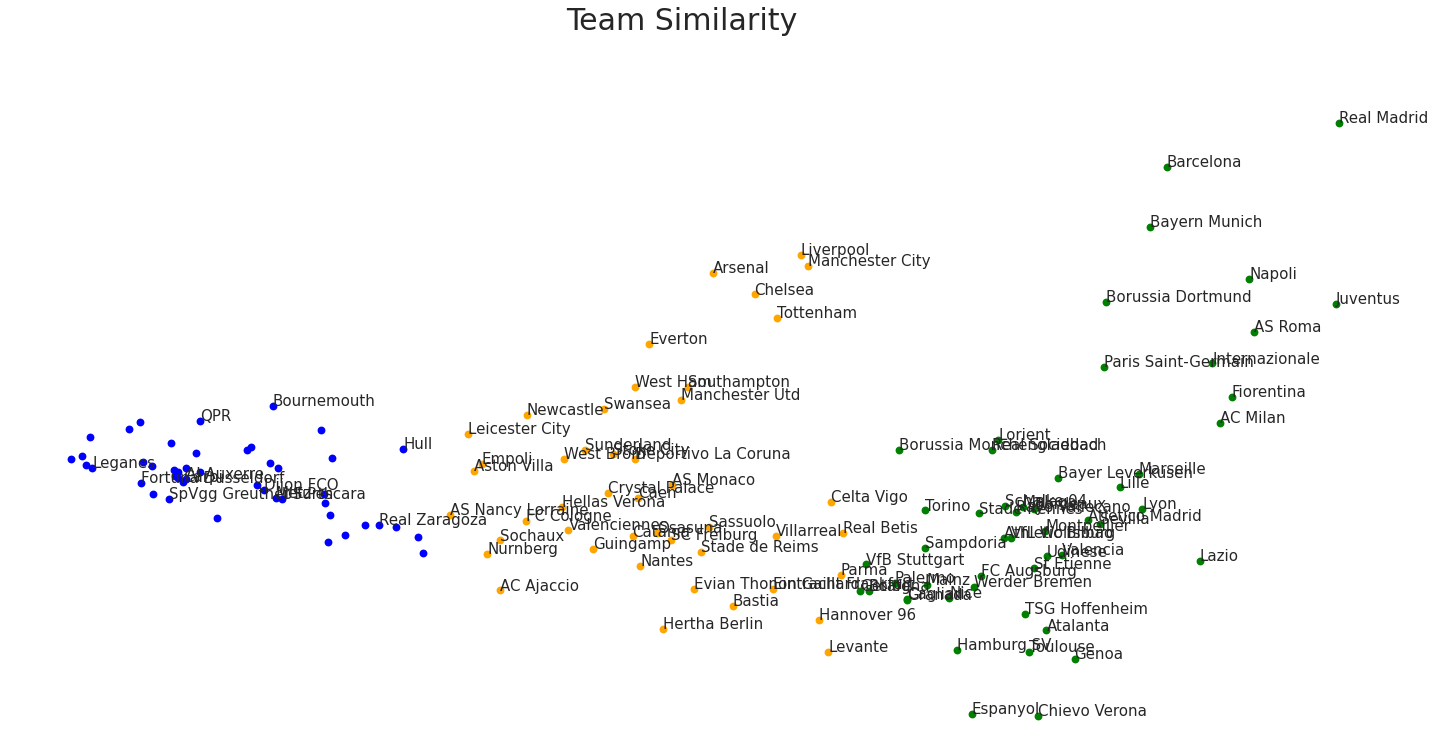

In [57]:
col=['orange','blue','green','red','yellow']


fig, ax = plt.subplots(figsize=(25,12))

fig.suptitle('Team Similarity',fontsize=30)
for i in range (5):
    filt=data1[data1['labels']==i]
    t=filt['team'].tolist()
    ax.scatter(filt['var_1'],filt['var_2'],color=col[i],s=40)
    
    if 'Real Madrid' in t or 'Arsenal' in t:
        for j, txt in enumerate(t):
            ax.annotate(txt, (filt['var_1'].iloc[j], filt['var_2'].iloc[j]),fontsize=15)
    else:
        for j, txt in enumerate(t):
            if j%4==0:
                ax.annotate(txt, (filt['var_1'].iloc[j], filt['var_2'].iloc[j]),fontsize=15)
plt.axis('off')
plt.show()

In [58]:
!pip install kmeans-pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
!pip install fast-pytorch-kmeans

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 KB 2.9 MB/s eta 0:00:00
  Created wheel for fast-pytorch-kmeans: filename=fast_pytorch_kmeans-0.1.6-py3-none-any.whl size=7088 sha256=1eeadb69b8bb746cae8dc8e24fe13d7ed1cd8beddddb6636df3a0aa111b4c4f7
  Stored in directory: /root/.cache/pip/wheels/2e/72/e4/ea91c7dfb1567e62a9af6ffc46946fdc336bab4d730237763a
Successfully built fast-pytorch-kmeans


In [60]:
import torch

from kmeans_pytorch import kmeans, kmeans_predict
test_data = data1.drop(['team'],axis=1)

test_data

,yellow,red,foul,attemp,goals,situation_1.0,situation_3.0,situation_4.0,situation_2.0,location_9.0,location_15.0,location_3.0,location_11.0,location_13.0,location_16.0,location_17.0,location_7.0,location_8.0,location_12.0,location_10.0,location_19.0,location_6.0,location_14.0,location_18.0,assist_method_1,assist_method_0,assist_method_2,assist_method_3,assist_method_4,labels,var_1,var_2
event_team,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AC Ajaccio,238,12,1593,1106,110,913,74,33,86,71,457,336,92,27,24.0,20.0,9.0,10.0,12,13,8.0,9.0,15,3.0,490,344,198,43,31.0,0,-713.430617,-356.842526
AC Milan,502,18,2677,3065,320,2615,219,87,144,215,1465,784,256,93,23.0,19.0,28.0,35.0,29,34,22.0,10.0,51,1.0,1556,865,477,61,106.0,2,2504.786559,229.116595
AJ Auxerre,89,3,558,446,46,364,41,23,18,48,173,123,33,18,5.0,8.0,4.0,4.0,10,10,2.0,6.0,1,1.0,174,144,92,16,20.0,1,-2115.135256,32.572417
AS Monaco,243,8,1666,1665,228,1387,142,50,86,131,607,558,128,56,11.0,9.0,19.0,16.0,44,32,18.0,8.0,26,2.0,754,446,363,49,53.0,0,57.362047,11.511970
AS Nancy Lorraine,160,7,1260,1058,87,874,86,29,69,85,502,261,82,28,17.0,16.0,11.0,4.0,14,15,4.0,7.0,10,2.0,523,267,193,42,33.0,0,-938.448606,-91.840119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Villarreal,393,5,2045,1849,203,1578,146,42,83,164,709,512,191,64,9.0,10.0,35.0,26.0,46,34,11.0,11.0,24,3.0,924,493,295,43,94.0,0,519.477550,-164.715448
Watford,130,4,725,678,64,574,46,12,46,53,296,205,49,14,1.0,8.0,14.0,6.0,9,9,4.0,1.0,9,0.0,301,213,117,42,5.0,1,-1705.472515,71.697119
Werder Bremen,375,10,2645,2318,249,1912,208,49,149,184,885,726,184,70,34.0,15.0,26.0,31.0,42,50,17.0,24.0,27,3.0,1082,674,415,108,39.0,2,1406.667826,-344.308326


In [61]:
x = torch.tensor(test_data.to_numpy())
x

tensor([[ 2.3800e+02,  1.2000e+01,  1.5930e+03,  ...,  0.0000e+00,
         -7.1343e+02, -3.5684e+02],
        [ 5.0200e+02,  1.8000e+01,  2.6770e+03,  ...,  2.0000e+00,
          2.5048e+03,  2.2912e+02],
        [ 8.9000e+01,  3.0000e+00,  5.5800e+02,  ...,  1.0000e+00,
         -2.1151e+03,  3.2572e+01],
        ...,
        [ 3.7500e+02,  1.0000e+01,  2.6450e+03,  ...,  2.0000e+00,
          1.4067e+03, -3.4431e+02],
        [ 2.3000e+02,  6.0000e+00,  1.3280e+03,  ...,  0.0000e+00,
         -4.2710e+02,  1.0404e+02],
        [ 2.2600e+02,  1.0000e+01,  1.2710e+03,  ...,  0.0000e+00,
         -1.0787e+02,  3.5524e+02]], dtype=torch.float64)

In [62]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

In [63]:
cluster_ids_x, cluster_centers = kmeans(
    X=x, num_clusters=3, distance='euclidean', device=device
)

running k-means on cpu..


[running kmeans]: 6it [00:00, 78.59it/s, center_shift=0.000000, iteration=6, tol=0.000100]


In [64]:
print(cluster_ids_x)
print(cluster_centers)

tensor([0, 2, 1, 0, 0, 2, 1, 1, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1,
        1, 0, 2, 1, 1, 0, 0, 1, 0, 2, 1, 1, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 2, 0,
        1, 2, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 0, 0, 1, 2, 2, 1, 1, 2, 1, 1, 0, 1,
        0, 2, 0, 1, 2, 2, 2, 2, 1, 0, 0, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2,
        2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 0, 1, 1, 2, 0, 2, 2, 1, 0, 0, 1, 1, 2,
        2, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 1, 2, 2, 0, 2, 2, 0, 1, 2, 0, 0])
tensor([[ 2.6379e+02,  7.7209e+00,  1.5856e+03,  1.5811e+03,  1.6019e+02,
          1.3424e+03,  1.2551e+02,  3.4465e+01,  7.8744e+01,  1.3191e+02,
          6.4219e+02,  4.8877e+02,  1.2809e+02,  4.6395e+01,  1.2279e+01,
          1.3116e+01,  1.7512e+01,  1.5488e+01,  2.4488e+01,  2.3512e+01,
          1.0674e+01,  8.6047e+00,  1.6442e+01,  1.6279e+00,  7.5356e+02,
          4.2414e+02,  3.0086e+02,  5.5209e+01,  4.7326e+01,  0.0000e+00,
         -6.9191e+01,  2.4984e+01],
        [ 1.2078e+02,  3.1957e+00,  6.5993e+0

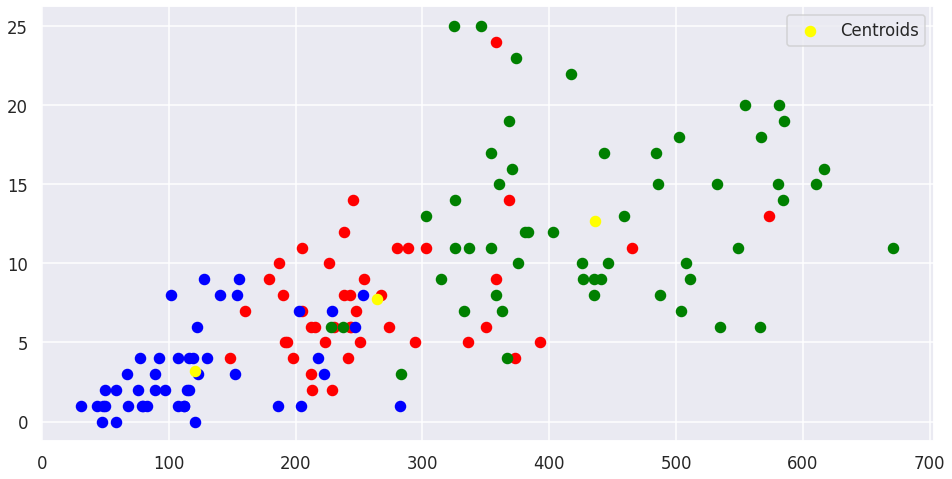

In [65]:
sns.set_style("darkgrid")
plt.figure(figsize = (16,8))
plt.scatter(x[cluster_ids_x == 0, 0], x[cluster_ids_x == 0, 1], 
            s = 100, c = 'red')
plt.scatter(x[cluster_ids_x == 1, 0], x[cluster_ids_x == 1, 1], 
            s = 100, c = 'blue')
plt.scatter(x[cluster_ids_x == 2, 0], x[cluster_ids_x == 2, 1],
            s = 100, c = 'green')


# Plotting the centroids of the clusters
plt.scatter(cluster_centers[:, 0], cluster_centers[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

**Clustering Using GMM algorithm**

In [66]:
data_gmm.head()

,yellow,red,foul,attemp,team,goals,situation_1.0,situation_3.0,situation_4.0,situation_2.0,location_9.0,location_15.0,location_3.0,location_11.0,location_13.0,location_16.0,location_17.0,location_7.0,location_8.0,location_12.0,location_10.0,location_19.0,location_6.0,location_14.0,location_18.0,assist_method_1,assist_method_0,assist_method_2,assist_method_3,assist_method_4,labels,var_1,var_2
event_team,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AC Ajaccio,238,12,1593,1106,AC Ajaccio,110,913,74,33,86,71,457,336,92,27,24.0,20.0,9.0,10.0,12,13,8.0,9.0,15,3.0,490,344,198,43,31.0,0,-713.430617,-356.842526
AC Milan,502,18,2677,3065,AC Milan,320,2615,219,87,144,215,1465,784,256,93,23.0,19.0,28.0,35.0,29,34,22.0,10.0,51,1.0,1556,865,477,61,106.0,2,2504.786559,229.116595
AJ Auxerre,89,3,558,446,AJ Auxerre,46,364,41,23,18,48,173,123,33,18,5.0,8.0,4.0,4.0,10,10,2.0,6.0,1,1.0,174,144,92,16,20.0,1,-2115.135256,32.572417
AS Monaco,243,8,1666,1665,AS Monaco,228,1387,142,50,86,131,607,558,128,56,11.0,9.0,19.0,16.0,44,32,18.0,8.0,26,2.0,754,446,363,49,53.0,0,57.362047,11.511970
AS Nancy Lorraine,160,7,1260,1058,AS Nancy Lorraine,87,874,86,29,69,85,502,261,82,28,17.0,16.0,11.0,4.0,14,15,4.0,7.0,10,2.0,523,267,193,42,33.0,0,-938.448606,-91.840119


In [67]:
fig2 = px.scatter_3d(data_gmm, x="yellow", y="red",z="foul",
                     color="team",size="goals")
fig2.update_layout(title="5 Features Representation")
fig2.show()
     


In [68]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [69]:
X=data_gmm[['attemp', 'goals']]
column_names =['attemp', 'goals']
X.head()
     

,attemp,goals
event_team,,
AC Ajaccio,1106,110
AC Milan,3065,320
AJ Auxerre,446,46
AS Monaco,1665,228
AS Nancy Lorraine,1058,87


In [70]:
scalar = MinMaxScaler()
X[column_names] = scalar.fit_transform(X)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
X.head()

,attemp,goals
event_team,,
AC Ajaccio,0.263705,0.170863
AC Milan,0.814450,0.548561
AJ Auxerre,0.078156,0.055755
AS Monaco,0.420860,0.383094
AS Nancy Lorraine,0.250211,0.129496


In [72]:
X_Kmeans = X
X_Kmeans

,attemp,goals
event_team,,
AC Ajaccio,0.263705,0.170863
AC Milan,0.814450,0.548561
AJ Auxerre,0.078156,0.055755
AS Monaco,0.420860,0.383094
AS Nancy Lorraine,0.250211,0.129496
...,...,...
Villarreal,0.472589,0.338129
Watford,0.143379,0.088129
Werder Bremen,0.604442,0.420863


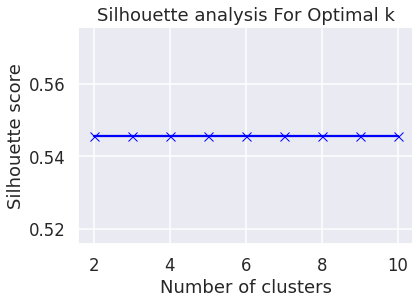

In [73]:
range_of_clusters = range(2, 11)
silhouette_avgerage = []
for num_clusters in range_of_clusters:
  gmm = GaussianMixture(n_components=i,covariance_type="full", random_state=0)
  gmm.fit(X)

  labels = gmm.predict(X)
  silhouette_avgerage.append(silhouette_score(X, labels, metric = 'euclidean', random_state=0))
  
 
  # plot silhouette score
plot.plot(range_of_clusters,silhouette_avgerage,'bx-')
plot.xlabel('Number of clusters')
plot.ylabel('Silhouette score')
plot.title('Silhouette analysis For Optimal k')
plot.show()

In [74]:
gmm_clust = GaussianMixture(n_components=4)
gmm_clust.fit(X)
     

GaussianMixture(n_components=4)

In [75]:
X['gmm_cluster'] = gmm_clust.predict(X)


<ipython-input-75-f5ad1354081c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



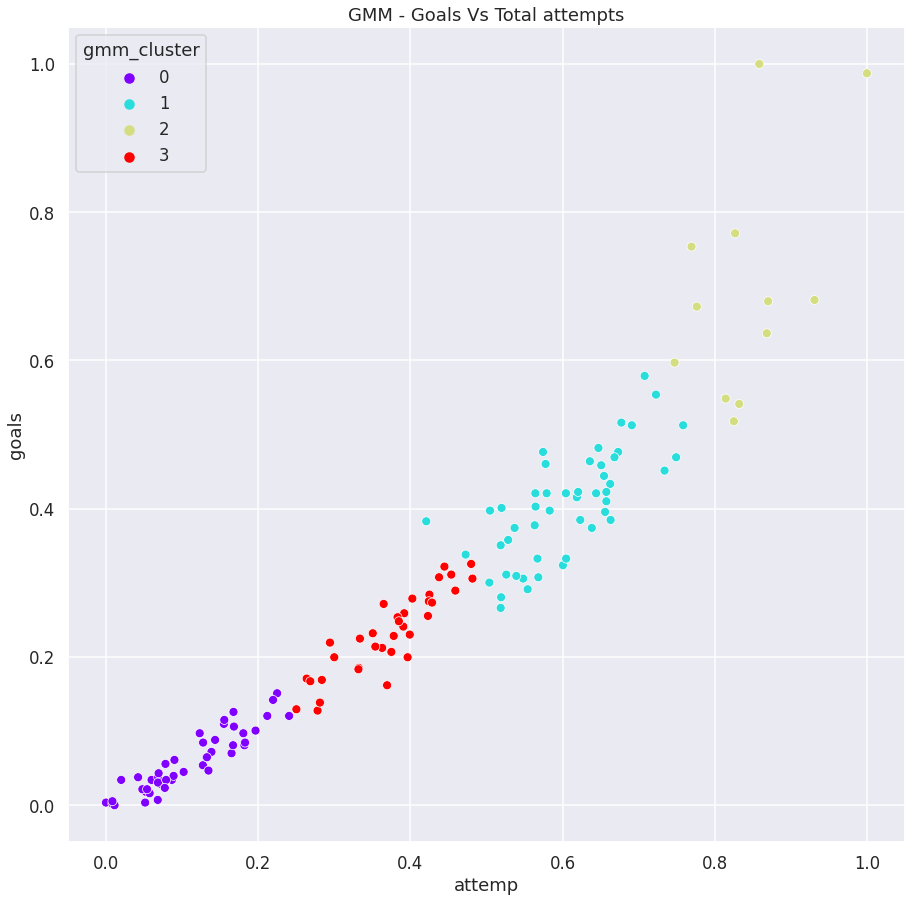

In [76]:
# plot GMM clusters
sns.set_context('talk')
plot.figure(figsize=(15,15))
sns.scatterplot(x=X['attemp'],y=X['goals'],hue=X['gmm_cluster'], palette='rainbow')
plot.title('GMM - Goals Vs Total attempts')
plot.show()

The K-means and Gaussian Misture provides a similar results for clustering.

**Comparision with K-means algorithm**

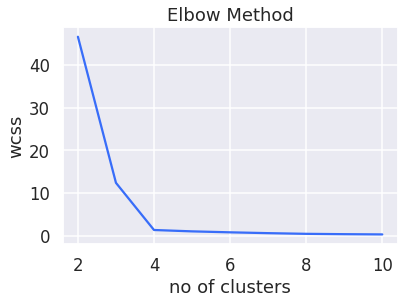

In [77]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(2,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans_model = kmeans.fit(X_Kmeans)
    wcss.append(kmeans.inertia_)     
plot.plot(range(2,11), wcss,)
plot.title('Elbow Method')
plot.xlabel('no of clusters')
plot.ylabel('wcss')
plot.show()

In [78]:
colors = ['b', 'g', 'r','y']
markers = ['o', 'v', 's','+']
kmeans_model = KMeans(4).fit(X_Kmeans)
X_Kmeans['kmeans_cluster'] = kmeans_model.predict(X_Kmeans)
     

<ipython-input-78-ae5e67d8b862>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



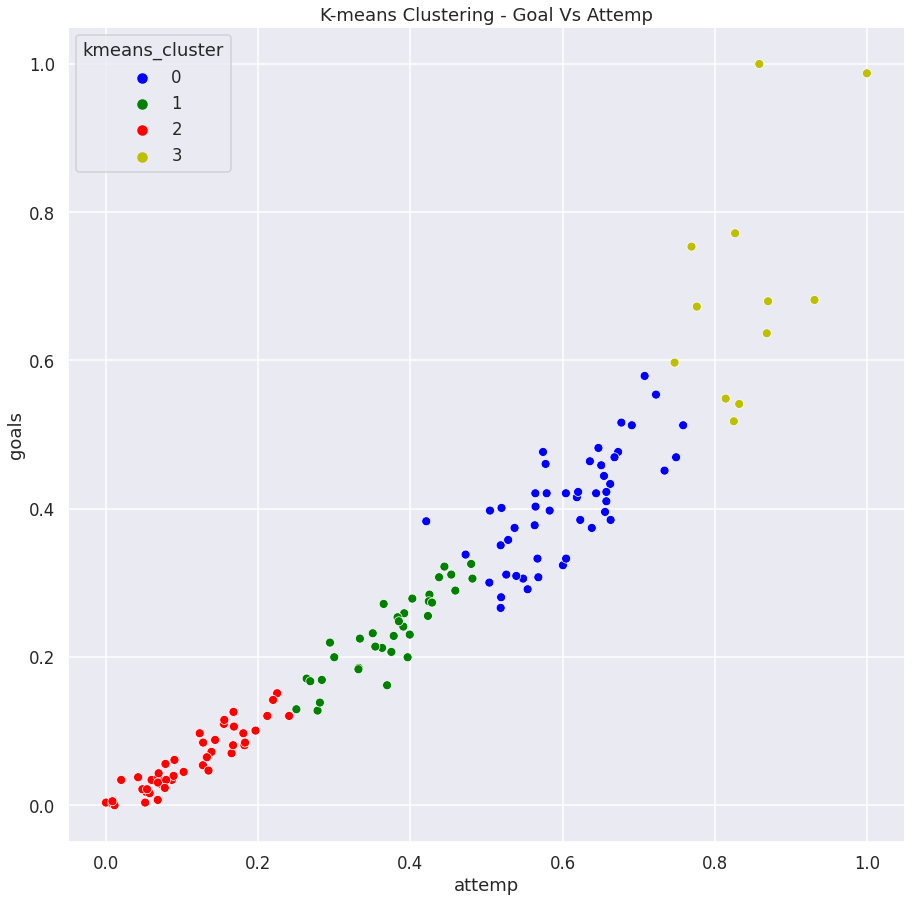

In [79]:
sns.set_context('talk')
plot.figure(figsize=(15,15))
sns.scatterplot(x=X_Kmeans['attemp'],y=X_Kmeans['goals'],hue=X_Kmeans['kmeans_cluster'], palette=colors)
plot.title('K-means Clustering - Goal Vs Attemp')
plot.show()

***The K-means and Gaussian Misture provides a similar results for clustering.***